In [14]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import time

In [2]:
# importing the data
data=fetch_openml('mnist_784',return_X_y=True)

In [3]:
# Splitting the data
trainX=data[0][:60000,:]
trainY=data[1][:60000]
testX=data[0][60000:,:]
testY=data[1][60000:]



[['0' 2819]
 ['1' 3370]
 ['2' 2996]
 ['3' 2985]
 ['4' 2958]
 ['5' 2841]
 ['6' 2994]
 ['7' 3149]
 ['8' 2883]
 ['9' 3005]] [['0' 1451]
 ['1' 1692]
 ['2' 1471]
 ['3' 1515]
 ['4' 1475]
 ['5' 1429]
 ['6' 1461]
 ['7' 1563]
 ['8' 1452]
 ['9' 1491]]


In [4]:
# Subsample
train_labels=np.array([int(i) for i in trainY])


In [5]:
# function to separate the dataset by digits
def separate_classes_list(X,y):
    X_classes_list=[]
    y_int=np.zeros(len(y))
    
    train_labels=np.array([int(i) for i in trainY])
    
    
    for i in range(10):
        index= np.where(train_labels==i)[0]
        
        X_classes_list.append(np.array([X[j] for j in index]))
        
    return X_classes_list

In [6]:
trainX_by_class=separate_classes_list(trainX,trainY)

In [7]:
trainX_by_class[1].shape

(6742, 784)

In [8]:
# Check if split correctly
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [29]:
# Confirm the type
testX.max()

255.0

In [10]:
# Normalise
trainX_norm=trainX/255
testX_norm=testX/255

# Check if normalised correctly
print(f'Min of x_norm_train: {trainX_norm.min()}, \nMax of x_norm_train: {trainX_norm.max()}')
print(f'Min of x_norm_train: {testX_norm.min()}, \nMax of x_norm_train: {testX_norm.max()}')

Min of x_norm_train: 0.0, 
Max of x_norm_train: 1.0
Min of x_norm_train: 0.0, 
Max of x_norm_train: 1.0


In [18]:
#subsets to use
X_sub2=trainX_norm[::2,:]
Y_sub2=trainY[::2]

# return unique count
label_tally2=np.array(np.unique(Y_sub2,return_counts=True)).T

X_sub4=trainX_norm[::4,:]
Y_sub4=trainY[::4]


# return unique count
label_tally4=np.array(np.unique(Y_sub4,return_counts=True)).T

X_sub10=trainX_norm[::10,:]
Y_sub10=trainY[::10]

# return unique count
label_tally10=np.array(np.unique(Y_sub10,return_counts=True)).T
print(label_tally10)

[['0' 545]
 ['1' 660]
 ['2' 622]
 ['3' 626]
 ['4' 566]
 ['5' 581]
 ['6' 630]
 ['7' 644]
 ['8' 555]
 ['9' 571]]


C:\Users\b_pau\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Loss')

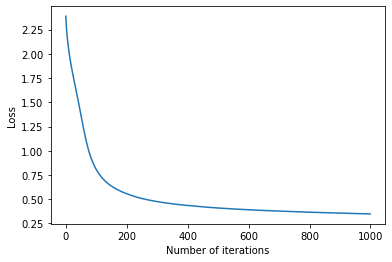

In [53]:
start_time=time.time()
# Run classifier
nn_clf = MLPClassifier(hidden_layer_sizes=(10),
                    activation='relu',
                    solver='sgd',
                    alpha=0.0001,
                    learning_rate_init=1e-4,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
nn_clf.fit(X_sub10, Y_sub10)

training_ann=round(nn_clf.score(X_sub10, Y_sub10),4)
test_ann=round(nn_clf.score(testX_norm, testY),4)

end_time=time.time()



# Plot Loss Curve
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nn_clf.loss_curve_)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Loss')

In [54]:
# Print training and test accuracy and plot confusion matrix
print('Training accuracy: ',training_ann )
print('Testing accuracy: ', test_ann)

time_elapsed= end_time-start_time

print('Time elapsed with ANN: {:.2f} s'.format(time_elapsed))



Training accuracy:  0.9024
Testing accuracy:  0.8981
Time elapsed with ANN: 284.27 s


In [11]:
# Sanity check
nn_clf.predict(testX[:12])

array(['7', '2', '1', '0', '4', '1', '4', '9', '6', '9', '0', '6'],
      dtype='<U1')

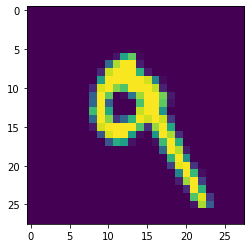

In [12]:
plt.imshow(testX[7].reshape(28,28))

Training accuracy:  0.9452
Testing accuracy:  0.9406


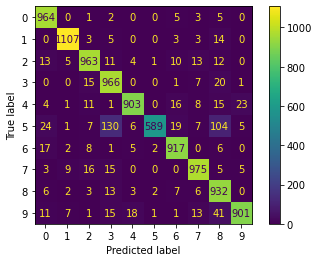

In [52]:
# Print training and test accuracy and plot confusion matrix
print('Training accuracy: ',training_ann )
print('Testing accuracy: ', test_ann)

plot_confusion_matrix(nn_clf, testX, testY)
plt.show()

In [54]:
# Careful with the SVM as it takes insanely long- MNIST says it's really accurate
# RBF kernelis default, runs one to one classification- lets try running a smaller traiining set


svm=SVC(C=2)
svm.fit(trainX_svm[::4,:],trainY_svm[::4])

y_pred=svm.predict(testX)



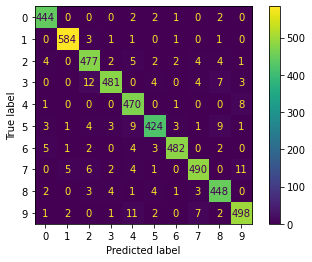

In [56]:
plot_confusion_matrix(svm,testX[::2,:],testY[::2])

In [23]:
print(f'SVM classifier training accuracy: {svm.score(trainX_svm, trainY_svm)}, Test accuracy: {svm.score(testX,testY)}')

SVM classifier training accuracy: 0.9957666666666667, Test accuracy: 0.9775


In [59]:
print(f'SVM classifier training accuracy: {svm.score(trainX_svm[::4,:], trainY_svm[::4])}, Test accuracy: {svm.score(testX[::2,:],testY[::2])}')

SVM classifier training accuracy: 0.9936, Test accuracy: 0.9596


In [30]:
# Careful with the SVM as it takes insanely long- MNIST says it's really accurate
# RBF kernelis default, runs one to one classification- lets try running a smaller traiining set

start_timesvc=time.time()
svm2=SVC(C=2)
svm2.fit(X_sub10,Y_sub10)

training_svc=round(svm2.score(X_sub10, Y_sub10),4)
test_svc= round(svm2.score(testX_norm, testY),4)

end_timesvc=time.time()







In [31]:
# Print training and test accuracy and plot confusion matrix
print('Training accuracy: ', training_svc)
print('Testing accuracy: ',test_svc)
time_elapsed_svc= end_timesvc-start_timesvc

print('Time elapsed with SVC: {:.2f} s'.format(time_elapsed_svc))

Training accuracy:  0.9935
Testing accuracy:  0.9557
Time elapsed with SVC: 49.67 s


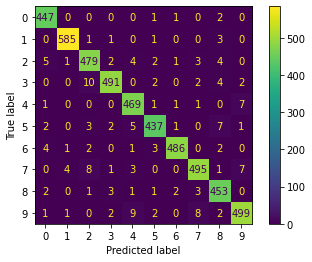

In [70]:
plot_confusion_matrix(svm2,testX[::2],testY[::2])

#### Run CV on both NN and SVM

In [ ]:
# Run
alphas = np.logspace(-3, -0, 100)
learning_rates = np.logspace(-4, -2, 100)
parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}

nn = MLPClassifier(hidden_layer_sizes=(64),
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)

clf = RandomizedSearchCV(nn, parameters, scoring='accuracy', n_iter=10, cv=3, verbose=2)

clf.fit(train_x, train_y.flatten())
clf.best_params_
